In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data_path = "/home/roseyu/Python/TensorCompress/experiments/log/tensor_rnn/"
max_epoch = 5 


file_name = "predict_epoch_10.npy"
[ test_true, test_predict] = np.load(data_path + file_name)

y_true = train_true
y_predict = train_predict
print("true shape", len(y_true))

print("predict shape",len(y_predict))
print(len(y_predict[0]))

plt.figure(1, figsize=(10,6))
plt.subplot(5,1,1)
x = np.linspace(1, 100, num= 100)
plt.title('Ground Truth')
plt.plot(x, y_true[100:200],'b')
plt.subplot(212)
for epoch in range(1,max_epoch):

    file_name = "predict_epoch_"+str(epoch)+"0.npy"
    test_true, test_predict= np.load(data_path + file_name)
    y_true = train_true
    y_predict = train_predict

    #plt.plot(x,y_true[0:100],'b--', x, y_predict[0:100], 'ro' )
    plt.subplot(5,1,epoch+1)
    plt.plot(x, y_predict[100:200],'r')
    plt.title('Epoch '+str(epoch)+"0")
    plt.ylim([0,1])
plt.tight_layout()

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data_path = "/home/roseyu/Python/TensorCompress/experiments/log/ts_rnd_exp/tt_rnn/"
max_epoch = 5 


def reshape_pred(pred, batch_size):
    """reshape into batch_size x num_steps,  concatenate on num_stesp"""
    num_step = 12
    epoch_size = len(pred)
    pred_list = []
    for epoch in range(epoch_size):
        pred_reshape = np.reshape(pred[epoch], (batch_size, num_step))
        pred_list.append(pred_reshape)

    pred_out = np.concatenate(pred_list, axis = 1)
    return pred_out.flatten()
        
    
    
file_name = "predict.npy"
test_true, test_pred, _,test_err= np.load(data_path + file_name)
test_pred = np.squeeze(test_pred)
print(test_true.shape)
print("test error: %f",test_err)
# rescale
#test_pred =(test_pred-np.mean(test_pred))*(-692)+ np.mean(test_true)


IOError: [Errno 2] No such file or directory: '/home/roseyu/Python/TensorCompress/experiments/log/ts_rnd_exp/tt_rnn/predict.npy'

NameError: name 'test_target' is not defined

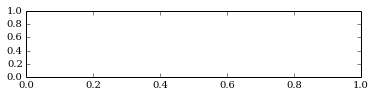

In [8]:
import numpy as np
plt.rc('font', family='serif')

plt.plot([1, 2, 3, 4])

fig = plt.figure(1, figsize=(10,8))



x = np.linspace(1, 100, num= 100)
plt.title('Ground Truth')
ax1 = plt.subplot(311)
plt.plot(x,test_target[100:200],'k-' )

ax2 = plt.subplot(312)
plt.plot(x,test_pred_rnn[100:200],'k:' )
plt.ylim([0,1])

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(x,test_pred[100:200,], 'k--' )
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel('Time Step')
plt.savefig("../result/synth_forecast_rnn.pdf")

In [9]:
"""training step vs training loss"""
import csv
import numpy
# with open("../result/ts_lstm.csv","rb") as csvfile:
#     fstream = csv.reader(csvfile)
#     x = list(fstream)
#     ts_lstm = numpy.array(x).astype("float")
ts_lstm = numpy.loadtxt(open("../result/ts_lstm.csv", "rb"), delimiter=",", skiprows=1)
ts_tt = numpy.loadtxt(open("../result/ts_tt.csv", "rb"), delimiter=",", skiprows=1)
ts_mrnn = numpy.loadtxt(open("../result/ts_mrnn.csv", "rb"), delimiter=",", skiprows=1)

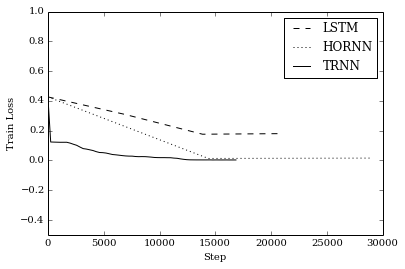

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.plot([1, 2, 3, 4])
fig = plt.figure(1, figsize=(10,8))
end_point = 4
ts_lstm[0,2] = ts_tt[0,2] 
ts_mrnn[0,2] = ts_tt[0,2]
lstm,=plt.plot(ts_lstm[:end_point,1], ts_lstm[:end_point,2],'k--')
tt,=plt.plot(ts_tt[:,1], ts_tt[:,2], 'k-')
mrnn,=plt.plot(ts_mrnn[:end_point-1,1], ts_mrnn[:end_point-1,2], 'k:')

plt.ylim([-0.5,1])
plt.xlabel('Step')
plt.ylabel('Train Loss')
plt.legend([lstm, mrnn, tt], ['LSTM', 'HORNN' ,'TRNN'])
plt.savefig("../result/ts_train_speed.pdf")